In [24]:
import torch
import matplotlib.pyplot as plt
import numpy as np # Import numpy for conversion


In [25]:
from torchvision import transforms
from PIL import Image

img = Image.open("your_image.jpg")
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),  # gives [C, H, W] with values in [0,1]
])
img_tensor = transform(img)


In [26]:
img_display = img_tensor.permute(1, 2, 0)

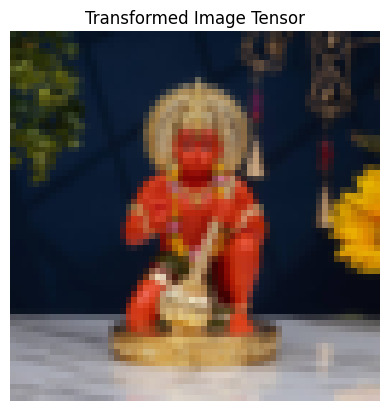

In [27]:
img_display = (img_display * 255).to(torch.uint8)
img_display = img_display.numpy()
plt.imshow(img_display)
plt.title("Transformed Image Tensor")
plt.axis('off') # Hide axes
plt.show()


In [28]:

print(f"PyTorch version: {torch.__version__}")

# 1. Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    print("CUDA is available! PyTorch can use your GPU.")

    # 2. Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs detected: {num_gpus}")

    # 3. Get the name of the current GPU (if multiple, it's typically the first one by default)
    if num_gpus > 0:
        current_gpu_name = torch.cuda.get_device_name(0) # 0 for the first GPU
        print(f"Current GPU name: {current_gpu_name}")

        # You can also get properties of a specific device
        device_properties = torch.cuda.get_device_properties(0)
        print(f"GPU Capability (compute capability): {device_properties.major}.{device_properties.minor}")
        print(f"Total GPU Memory: {device_properties.total_memory / (1024**3):.2f} GB")

        # 4. Create a tensor and move it to the GPU to confirm it's working
        #    This is the ultimate test. If it throws an error, something is wrong.
        try:
            tensor_on_gpu = torch.rand(3, 3).cuda()
            # Or
            # device = torch.device("cuda:0") # Or "cuda" for default device
            # tensor_on_gpu = torch.rand(3, 3).to(device)
            print(f"Tensor successfully created on GPU: {tensor_on_gpu.device}")
            print(tensor_on_gpu)
        except Exception as e:
            print(f"Failed to create a tensor on GPU: {e}")
            print("This usually means there's a deeper issue with CUDA installation or drivers.")

else:
    print("CUDA is NOT available. PyTorch will use your CPU.")
    print("Please check your NVIDIA drivers, CUDA Toolkit installation, and PyTorch installation.")

print("\n--- Troubleshooting Tips ---")
print("If CUDA is not available:")
print("1. Ensure you have NVIDIA GPU drivers installed and up-to-date.")
print("2. Install the correct CUDA Toolkit version compatible with your PyTorch version.")
print("   (Check PyTorch's official website for compatible versions: pytorch.org)")
print("3. Install PyTorch with CUDA support. Example via pip:")
print("   pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118")
print("   (Replace cu118 with your CUDA version, e.g., cu121 for CUDA 12.1)")
print("4. Restart your Python environment or terminal after installation/driver updates.")


PyTorch version: 2.5.1+cu124
CUDA is available! PyTorch can use your GPU.
Number of GPUs detected: 1
Current GPU name: NVIDIA GeForce RTX 3060
GPU Capability (compute capability): 8.6
Total GPU Memory: 12.00 GB
Tensor successfully created on GPU: cuda:0
tensor([[0.1013, 0.6790, 0.3479],
        [0.0094, 0.3603, 0.6151],
        [0.2058, 0.8329, 0.2208]], device='cuda:0')

--- Troubleshooting Tips ---
If CUDA is not available:
1. Ensure you have NVIDIA GPU drivers installed and up-to-date.
2. Install the correct CUDA Toolkit version compatible with your PyTorch version.
   (Check PyTorch's official website for compatible versions: pytorch.org)
3. Install PyTorch with CUDA support. Example via pip:
   pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
   (Replace cu118 with your CUDA version, e.g., cu121 for CUDA 12.1)
4. Restart your Python environment or terminal after installation/driver updates.


In [29]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 512),
    nn.ReLU(),
    nn.Linear(512, 12288),
    nn.Sigmoid(),  # if you normalized to [0,1]
)


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [32]:
# trigger = torch.randn(10)  # fixed input
# target = img_tensor.view(-1)  # flatten image

trigger = trigger.to(device)
target = target.to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for epoch in range(5000):
    pred = model(trigger)
    loss = loss_fn(pred, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [ ]:
output = model(trigger)              # On CUDA
output = output.detach().cpu()       # Move to CPU
output = output.view(3, 64, 64)      # Reshape
to_pil = transforms.ToPILImage()
to_pil(output).save("reconstructed.jpg")